In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [19]:
btc = pd.read_csv('./data/coin_Bitcoin.csv')
btc

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [20]:
btc.shape

(2991, 10)

In [21]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [22]:
# we see that 'Date' column is an object (likely string), better to convert to datetime for this time series analysis
btc.Date = pd.to_datetime(btc.Date)
btc.info() # we see now it's datetime64 variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2991 non-null   int64         
 1   Name       2991 non-null   object        
 2   Symbol     2991 non-null   object        
 3   Date       2991 non-null   datetime64[ns]
 4   High       2991 non-null   float64       
 5   Low        2991 non-null   float64       
 6   Open       2991 non-null   float64       
 7   Close      2991 non-null   float64       
 8   Volume     2991 non-null   float64       
 9   Marketcap  2991 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 233.8+ KB


In [23]:
btc_graph1 = btc[['Date', 'Close']]
btc_graph1

,Date,Close
0,2013-04-29 23:59:59,144.539993
1,2013-04-30 23:59:59,139.000000
2,2013-05-01 23:59:59,116.989998
3,2013-05-02 23:59:59,105.209999
4,2013-05-03 23:59:59,97.750000
...,...,...
2986,2021-07-02 23:59:59,33897.048590
2987,2021-07-03 23:59:59,34668.548402
2988,2021-07-04 23:59:59,35287.779766
2989,2021-07-05 23:59:59,33746.002456


In [24]:
btc_graph1 = btc_graph1.set_index('Date') # set_index() does not do things "in place", so must assign it to variable
type(btc_graph1) # still df

pandas.core.frame.DataFrame

In [25]:
btc_graph1.Close # this is a series
type(btc_graph1.Close)

pandas.core.series.Series

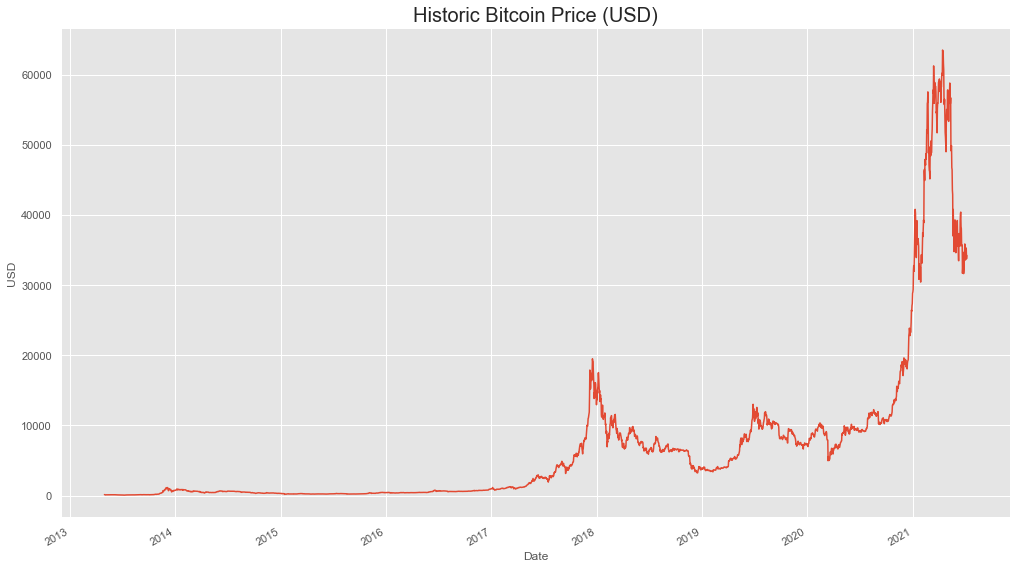

In [26]:

plt.figure(figsize = (17,10))
ax = btc_graph1.Close.plot() # because it's a series, uses index as x-axis
# ax.set_xticklabels(labels=keys, rotation=90)
# ax.set_yticklabels(labels=keys, rotation=0)
ax.set_title('Historic Bitcoin Price (USD)', size = 20)
ax.set_ylabel('USD')
plt.savefig('./images/BTC.png')

In [27]:
# eth = pd.read_csv('C://Code/Galvanize/Capstone1/data/coin_Ethereum.csv')
eth = pd.read_csv('./data/coin_Ethereum.csv')
eth # note only 2160 rows (bth has 2991) <-- because btc has been around longer and has been tracked since 2013. eth tracked starting 2015.08.08
# start date of these daily rows is later for eth compared to btc

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07
...,...,...,...,...,...,...,...,...,...,...
2155,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2156,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2157,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
2158,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


In [28]:
eth.shape

(2160, 10)

In [29]:
eth.info() # no missing data, like btc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   Date       2160 non-null   object 
 4   High       2160 non-null   float64
 5   Low        2160 non-null   float64
 6   Open       2160 non-null   float64
 7   Close      2160 non-null   float64
 8   Volume     2160 non-null   float64
 9   Marketcap  2160 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 168.9+ KB


In [30]:
# we see that 'Date' column is an object (likely string), better to convert to datetime for this time series analysis
eth.Date = pd.to_datetime(btc.Date)
eth.info() # we see now it's datetime64 variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2160 non-null   int64         
 1   Name       2160 non-null   object        
 2   Symbol     2160 non-null   object        
 3   Date       2160 non-null   datetime64[ns]
 4   High       2160 non-null   float64       
 5   Low        2160 non-null   float64       
 6   Open       2160 non-null   float64       
 7   Close      2160 non-null   float64       
 8   Volume     2160 non-null   float64       
 9   Marketcap  2160 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 168.9+ KB


In [31]:
eth_graph1 = eth[['Date', 'Close']]
eth_graph1 # this is a df

,Date,Close
0,2013-04-29 23:59:59,0.753325
1,2013-04-30 23:59:59,0.701897
2,2013-05-01 23:59:59,0.708448
3,2013-05-02 23:59:59,1.067860
4,2013-05-03 23:59:59,1.217440
...,...,...
2155,2019-03-24 23:59:59,2150.040364
2156,2019-03-25 23:59:59,2226.114282
2157,2019-03-26 23:59:59,2321.724112
2158,2019-03-27 23:59:59,2198.582464


<AxesSubplot:>

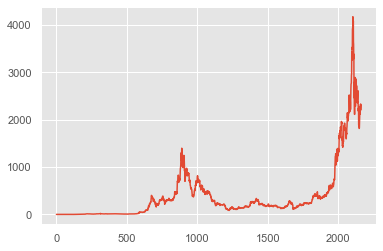

In [32]:
eth_graph1.Close.plot() # because we call the individual column 'Close' via the attribute .Close , it is now a series (not df), hence it uses index as x-axis and the series value as y-axis

In [33]:
# functionalize import csv, add Win/lose column (up or down during the day, and graph (closing price)
import pandas as pd
import numpy as np

def import_data(filename):
    df = pd.read_csv(filename)
    df.Date = pd.to_datetime(df.Date)
    df['Diff'] = df['Close'] - df['Open']
    df['Percent'] = df['Diff']/df['Open']
    df['Up'] = df['Diff'] >= 0
    # convert to 1 and 0, 1 is 0
    df['Up'] = df['Up'].apply(lambda x: 1 if x == True else 0)
    df['Standard'] = (df['Close'] - df['Close'].mean()) / df['Close'].std() # Standardization of closing prices
    
    return df



def plot_df(df): #filename is the full relative (or absolute) path + filename + extension
    df_graph1 = df[['Date', 'Standard']]
    df_graph1 = df_graph1.set_index('Date')
    df_graph1.Standard.plot()

# if I'm plotting graph, cannot return a df in the same function

# Create separate function for plot, this function to return df

In [34]:
filename = './data/coin_Litecoin.csv'

df_Litecoin = import_data(filename)

df_Litecoin

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Diff,Percent,Up,Standard
0,1,Litecoin,LTC,2013-04-29 23:59:59,4.573600,4.225640,4.366760,4.383900,0.000000e+00,7.538896e+07,0.017140,0.003925,1,-0.709911
1,2,Litecoin,LTC,2013-04-30 23:59:59,4.572380,4.168960,4.403520,4.296490,0.000000e+00,7.402092e+07,-0.107030,-0.024306,0,-0.711293
2,3,Litecoin,LTC,2013-05-01 23:59:59,4.356860,3.520290,4.289540,3.801010,0.000000e+00,6.560460e+07,-0.488530,-0.113889,0,-0.719128
3,4,Litecoin,LTC,2013-05-02 23:59:59,4.039300,3.007170,3.780020,3.371980,0.000000e+00,5.828798e+07,-0.408040,-0.107947,0,-0.725912
4,5,Litecoin,LTC,2013-05-03 23:59:59,3.453610,2.395940,3.390440,3.044910,0.000000e+00,5.269485e+07,-0.345530,-0.101913,0,-0.731084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,2987,Litecoin,LTC,2021-07-02 23:59:59,138.787700,130.935471,137.299274,136.943696,1.418981e+09,9.141322e+09,-0.355578,-0.002590,0,1.386212
2987,2988,Litecoin,LTC,2021-07-03 23:59:59,141.356011,134.945288,136.930584,140.279688,1.236494e+09,9.364008e+09,3.349104,0.024458,1,1.438963
2988,2989,Litecoin,LTC,2021-07-04 23:59:59,147.836059,137.096427,140.317998,144.905849,1.431657e+09,9.672815e+09,4.587852,0.032696,1,1.512115
2989,2990,Litecoin,LTC,2021-07-05 23:59:59,144.849333,134.960263,144.849333,138.073246,1.338246e+09,9.216723e+09,-6.776088,-0.046780,0,1.404073


In [35]:
filename = './data/coin_Dogecoin.csv'

df_Doge = plot_df(filename)

# filename = './data/coin_Cardano.csv'
# plot_ts(filename)

TypeError: string indices must be integers

In [36]:
df_Doge

NameError: name 'df_Doge' is not defined

In [37]:
    df = pd.read_csv(filename)
    df.Date = pd.to_datetime(df.Date)
    df['Diff'] = df['Close'] - df['Open']
    df['Percent'] = df['Diff']/df['Open']
    df['Up'] = df['Diff'] >= 0
    # convert to 1 and 0, 1 is 0
    df['Up'] = df['Up'].apply(lambda x: 1 if x == True else 0)
df

# ideas for further steps
'''
- extract date of the week, week of the year, month.
--> then groupby 'average', day of the week, month,

Are there any weekly patterns over time? extract week and year (single column), then group by week, or year, then plot and see pattern over the entire year.

function called resample that can resample.

look up "resample" <-- pandas function; resample the data by year, quarter, week.
aggregate data by whatever frequency that I want.
What is resample? aggregateing data by a different interval (but it's still in order)

- two pairs of time in the dataset after stationizing data.
- does the even impact the data before or after event
hypothesis before

- even if we stationize the data, it might mess up the correlation, because regular T-test may not account for it.

- Causal Impact <-- package bayesian hypothesis testing on time series data.

'''

'\n- extract date of the week, week of the year, month.\n--> then groupby \'average\', day of the week, month,\n\nAre there any weekly patterns over time? extract week and year (single column), then group by week, or year, then plot and see pattern over the entire year.\n\nfunction called resample that can resample.\n\nlook up "resample" <-- pandas function; resample the data by year, quarter, week.\naggregate data by whatever frequency that I want.\nWhat is resample? aggregateing data by a different interval (but it\'s still in order)\n\n- two pairs of time in the dataset after stationizing data.\n- does the even impact the data before or after event\nhypothesis before\n\n- even if we stationize the data, it might mess up the correlation, because regular T-test may not account for it.\n\n- Causal Impact <-- package bayesian hypothesis testing on time series data.\n\n'

In [38]:
jay = pd.DataFrame({'Open': [1], 'Close':[0]})
jay['Daily'] = jay['Close'] - jay['Open']
if jay['Daily'] < 0:
    jay['Win'] = 0
if jay['Daily'] >= 0:
    jay['Win'] = 1
jay

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [39]:
import os
file_list = os.listdir('./data')
file_list

['coin_Aave.csv',
 'coin_BinanceCoin.csv',
 'coin_Bitcoin.csv',
 'coin_Cardano.csv',
 'coin_ChainLink.csv',
 'coin_Cosmos.csv',
 'coin_CryptocomCoin.csv',
 'coin_Dogecoin.csv',
 'coin_EOS.csv',
 'coin_Ethereum.csv',
 'coin_Iota.csv',
 'coin_Litecoin.csv',
 'coin_Monero.csv',
 'coin_NEM.csv',
 'coin_Polkadot.csv',
 'coin_Solana.csv',
 'coin_Stellar.csv',
 'coin_Tether.csv',
 'coin_Tron.csv',
 'coin_Uniswap.csv',
 'coin_USDCoin.csv',
 'coin_WrappedBitcoin.csv',
 'coin_XRP.csv']

In [40]:
import os
file_list = os.listdir('./data')
# lst = list()
dct = dict()

for i in file_list:
    filename = './data/' + i
    df = import_data(filename)
    j = 'df' + i[4:-4]
    dct[j] = df
dct

{'df_Aave':      SNo  Name Symbol                Date        High         Low        Open  \
 0      1  Aave   AAVE 2020-10-05 23:59:59   55.112358   49.787900   52.675035   
 1      2  Aave   AAVE 2020-10-06 23:59:59   53.402270   40.734578   53.291969   
 2      3  Aave   AAVE 2020-10-07 23:59:59   42.408314   35.970690   42.399947   
 3      4  Aave   AAVE 2020-10-08 23:59:59   44.902511   36.696057   39.885262   
 4      5  Aave   AAVE 2020-10-09 23:59:59   47.569533   43.291776   43.764463   
 ..   ...   ...    ...                 ...         ...         ...         ...   
 270  271  Aave   AAVE 2021-07-02 23:59:59  234.483957  215.951539  230.814119   
 271  272  Aave   AAVE 2021-07-03 23:59:59  265.107342  228.485206  234.208478   
 272  273  Aave   AAVE 2021-07-04 23:59:59  289.001124  248.285491  259.399426   
 273  274  Aave   AAVE 2021-07-05 23:59:59  317.387234  263.433881  277.110533   
 274  275  Aave   AAVE 2021-07-06 23:59:59  346.714780  307.997525  307.997525   
 
   

In [41]:
dct.keys()

dict_keys(['df_Aave', 'df_BinanceCoin', 'df_Bitcoin', 'df_Cardano', 'df_ChainLink', 'df_Cosmos', 'df_CryptocomCoin', 'df_Dogecoin', 'df_EOS', 'df_Ethereum', 'df_Iota', 'df_Litecoin', 'df_Monero', 'df_NEM', 'df_Polkadot', 'df_Solana', 'df_Stellar', 'df_Tether', 'df_Tron', 'df_Uniswap', 'df_USDCoin', 'df_WrappedBitcoin', 'df_XRP'])

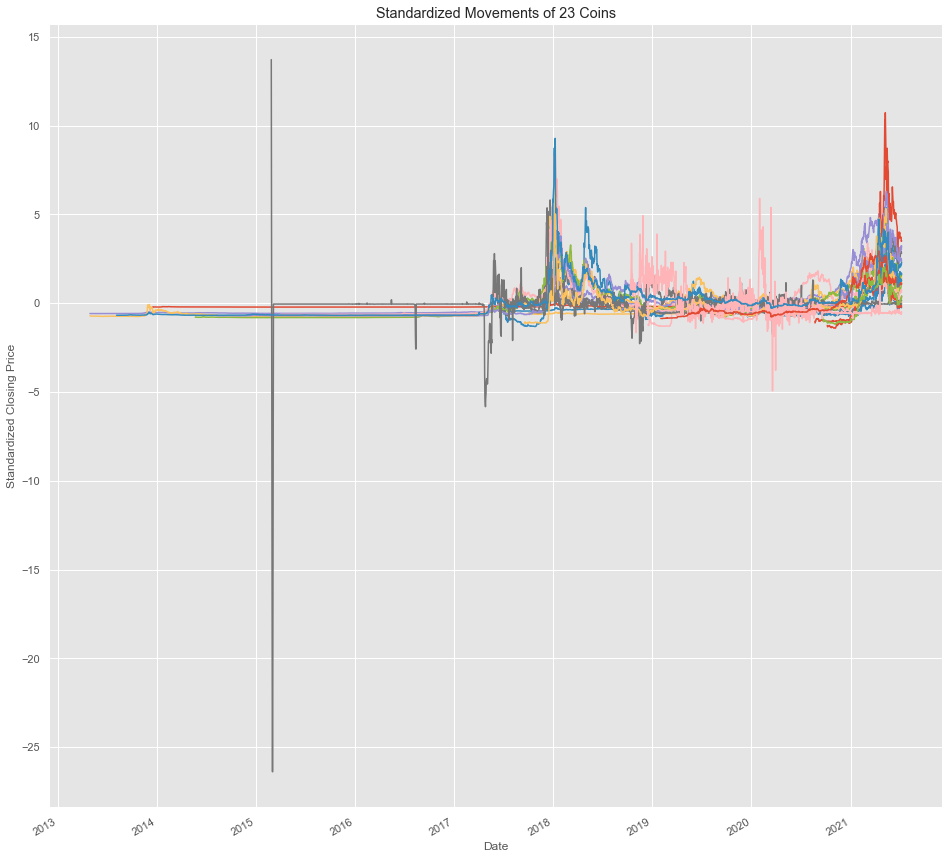

In [42]:
plt.figure(figsize = (16,16))
plt.title('Standardized Movements of 23 Coins')
plt.xlabel('Time')
plt.ylabel('Standardized Closing Price')

for df_name, df in dct.items():
    plot_df(df)
    

In [43]:
# figure out correlation between 2 time series. and figure out how to do it for each time series
# numpy for correlation (regular python)

# seaborn to visualize (heatmap.)

# going to create a matrix of coins (all combinations) and fill it with corresponding correlations.

In [44]:
import numpy as np

correlation_matrix = np.array((len(dct),len(dct)))
# correlation_matrix.columns = 

keys = list(dct.keys())
keys

for i in range(len(keys)):
    for j in range(len(keys)):
        df = pd.DataFrame()
        start_date_i = dct[keys[i]].iloc[0]['Date']
        start_date_j = dct[keys[i]].iloc[0]['Date']
        
        
#         len(dct[keys[i]]['Close']) > len(dct[keys[j]]['Close'])
        
#         len(dct[keys[i]]['Close']) < len(dct[keys[j]]['Close'])
        
#         np.corrcoef ((dct[keys[i]]['Close'], dct[keys[j]]['Close']))

In [45]:
start_date_i = dct[keys[0]].iloc[0]['Date']
start_date_j = dct[keys[1]].iloc[0]['Date']
start = start_date_i
if start_date_j > start_date_i:
    start = start_date_j

df1 = dct[keys[0]].set_index('Date') # Aave coin
df2 = dct[keys[1]].set_index('Date') # Binance coin
ts1 = df1.loc[start:,'Close']
ts2 = df2.loc[start:,'Close']

ts1

# create df out of 2 timeseries... ts1 pd.concat([series1,series2], axis = 1) <-- matches up by index <-- yes
df3 = pd.concat([ts1,ts2], axis = 1)

corr = df3.corr().iloc[1,0]
corr
# start_date_i 
# start_date_j

0.7741582904068568

In [46]:
# now find correlation for all combinations and write it into the correlation matrix

import numpy as np

correlation_matrix = np.zeros((len(dct),len(dct)))
# correlation_matrix.columns = 

keys = list(dct.keys())
keys

correlation_matrix.shape
for i in range(len(keys)):
    for j in range(len(keys)):
        start_date_i = dct[keys[i]].iloc[0]['Date']
        start_date_j = dct[keys[j]].iloc[0]['Date']
        start = start_date_i
        if start_date_j > start_date_i:
            start = start_date_j
        df1 = dct[keys[i]].set_index('Date') # [0] = Aave coin
        df2 = dct[keys[j]].set_index('Date') # [1] = Binance coin
        ts1 = df1.loc[start:,'Close']
        ts2 = df2.loc[start:,'Close']

        df3 = pd.concat([ts1,ts2], axis = 1)

        corr = df3.corr().iloc[1,0]
        correlation_matrix[j,i] = corr

correlation_matrix  

array([[ 1.00000000e+00,  7.74158290e-01,  8.77041331e-01,
         8.39792035e-01,  9.19572304e-01,  9.07633791e-01,
         6.06599690e-01,  6.09484660e-01,  7.37519473e-01,
         8.68677384e-01,  8.49440857e-01,  8.73240544e-01,
         7.78799625e-01,  6.31753627e-01,  9.15371985e-01,
         6.96013870e-01,             nan,  6.72032532e-02,
         7.31029706e-01,  9.26131097e-01,  1.04429301e-01,
         8.77759672e-01,  6.60442548e-01],
       [ 7.74158290e-01,  1.00000000e+00,  8.56401363e-01,
         8.93321800e-01,  8.69329421e-01,  9.02092493e-01,
         6.25583664e-01,  8.89386817e-01,  1.52797654e-01,
         9.04259873e-01,  3.00178739e-01,  6.43627824e-01,
         5.95745083e-01,  1.87591048e-01,  8.46351367e-01,
         9.48030983e-01,             nan, -8.12121030e-02,
         7.27637858e-01,  9.16157655e-01, -2.17446935e-01,
         8.50716181e-01,  4.84219543e-01],
       [ 8.77041331e-01,  8.56401363e-01,  1.00000000e+00,
         8.55017103e-01,  9.3

for bitcoin, correlations:

[ 8.77041331e-01,  8.56401363e-01,  1.00000000e+00,
         8.55017103e-01,  9.33914831e-01,  9.37843861e-01,
         6.69825341e-01,  6.48205644e-01,  1.17229730e-01,
         9.04147329e-01,  3.47407578e-01,  8.12678693e-01,
         7.47431732e-01,  4.65713154e-01,  9.51767927e-01,
         7.16856588e-01,  7.61317873e-01,  3.64008055e-02,
         6.50913646e-01,  9.05691805e-01, -3.23815194e-01,
         9.99966511e-01,  6.20505196e-01],
  
  
  ['df_Aave', 'df_BinanceCoin', 'df_Bitcoin', 'df_Cardano', 'df_ChainLink', 'df_Cosmos', 'df_CryptocomCoin', 'df_Dogecoin', 'df_EOS', 'df_Ethereum', 'df_Iota', 'df_Litecoin', 'df_Monero', 'df_NEM', 'df_Polkadot', 'df_Solana', 'df_Stellar', 'df_Tether', 'df_Tron', 'df_Uniswap', 'df_USDCoin', 'df_WrappedBitcoin', 'df_XRP']
  
  
Bitcoin (blue, 2013): 1.00000000e+00
Ethereum (green, 2015): 9.04147329e-01
Cosmos (orange, 2019): 9.37843861e-01
Uniswap (red, 2020): 9.05691805e-01
Polkadot (purple, 2020): 9.51767927e-01
  

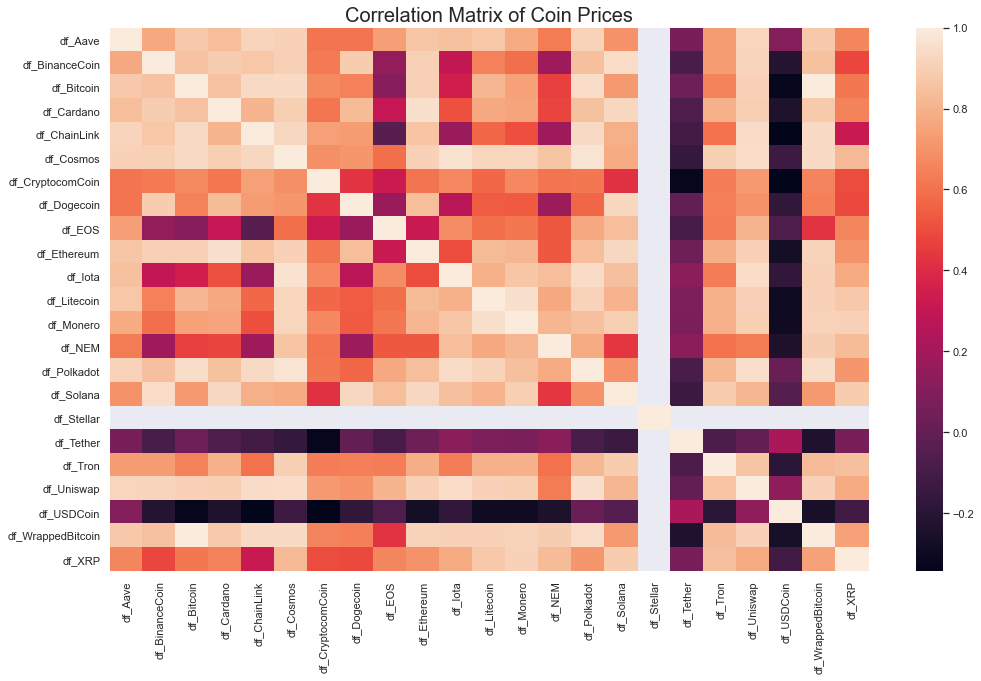

In [47]:
# import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
# uniform_data = np.random.rand(10, 12)

plt.figure(figsize = (17,10))
ax = sns.heatmap(correlation_matrix) #, annot=True) # dataframe or nparray
ax.set_xticklabels(labels=keys, rotation=90)
ax.set_yticklabels(labels=keys, rotation=0)
ax.set_title('Correlation Matrix of Coin Prices', size = 20)
plt.savefig('./images/correlation.png')

"\ndct.keys...\n['df_Aave', 'df_BinanceCoin', 'df_Bitcoin', 'df_Cardano', 'df_ChainLink', 'df_Cosmos', 'df_CryptocomCoin', 'df_Dogecoin', 'df_EOS', 'df_Ethereum', 'df_Iota', 'df_Litecoin', 'df_Monero', 'df_NEM', 'df_Polkadot', 'df_Solana', 'df_Stellar', 'df_Tether', 'df_Tron', 'df_Uniswap', 'df_USDCoin', 'df_WrappedBitcoin', 'df_XRP']\n"

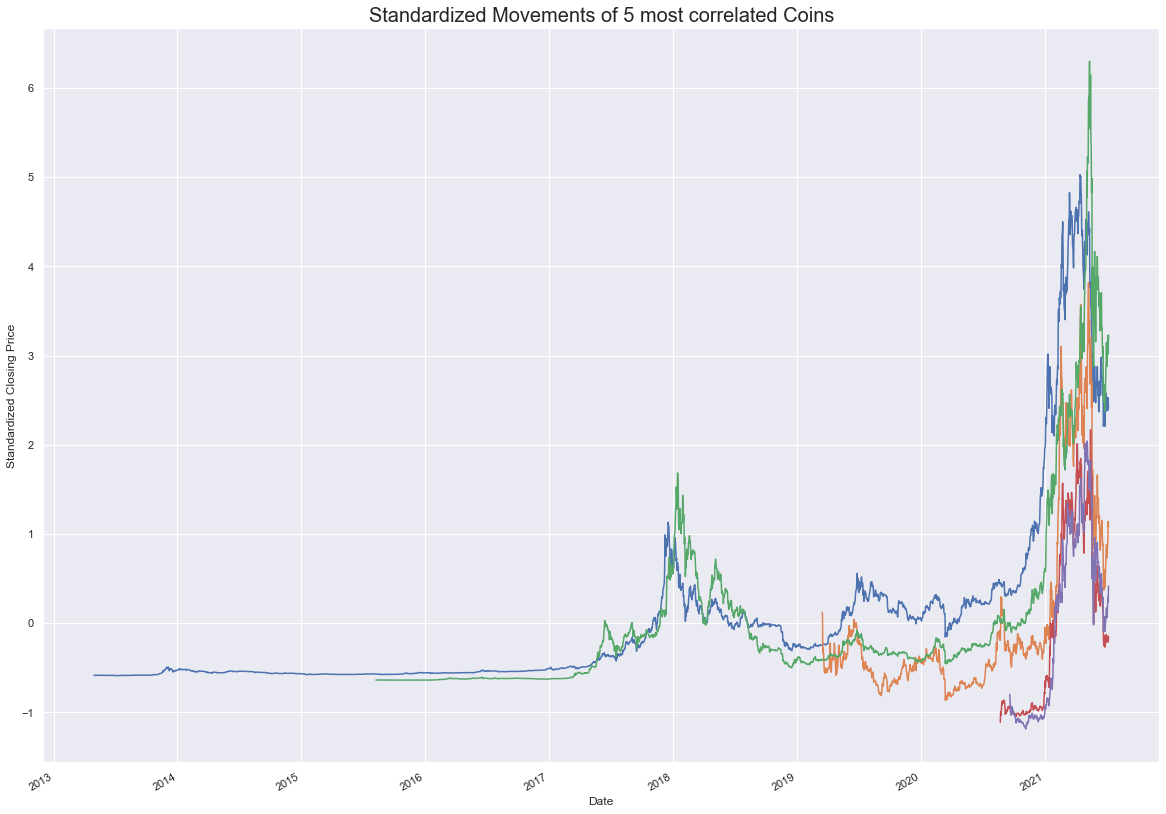

In [48]:
# plot standardized BTC with top 4 correlated coins: Cosmos, Ethereum, Pokadot, Uniswap
plt.figure(figsize = (20,15))
plt.title('Standardized Movements of 5 most correlated Coins', size=20)
plt.xlabel('Time')
plt.ylabel('Standardized Closing Price')
# plt.xlim([2017, ])

for df_name, df in dct.items():
    if df_name in ['df_Bitcoin', 'df_Cosmos', 'df_Ethereum', 'df_Polkadot', 'df_Uniswap']:
#     if df_name in ['df_Ethereum', 'df_Polkadot', 'df_Uniswap']:
        plot_df(df)
#         plt.legend()
    
plt.savefig('./images/standardized.png')
'''
dct.keys...
['df_Aave', 'df_BinanceCoin', 'df_Bitcoin', 'df_Cardano', 'df_ChainLink', 'df_Cosmos', 'df_CryptocomCoin', 'df_Dogecoin', 'df_EOS', 'df_Ethereum', 'df_Iota', 'df_Litecoin', 'df_Monero', 'df_NEM', 'df_Polkadot', 'df_Solana', 'df_Stellar', 'df_Tether', 'df_Tron', 'df_Uniswap', 'df_USDCoin', 'df_WrappedBitcoin', 'df_XRP']
'''

# Order of beginning dates: Bitcoin: Blue, Ethereum: Green, Cosmos 2019, Unswap first in 2020, PokaDot sedond in 2020

# Bitcoin (blue, 2013), Ethereum (green, 2015), Cosmos (orange, 2019), Uniswap (red, 2020), Polkadot (purple, 2020)


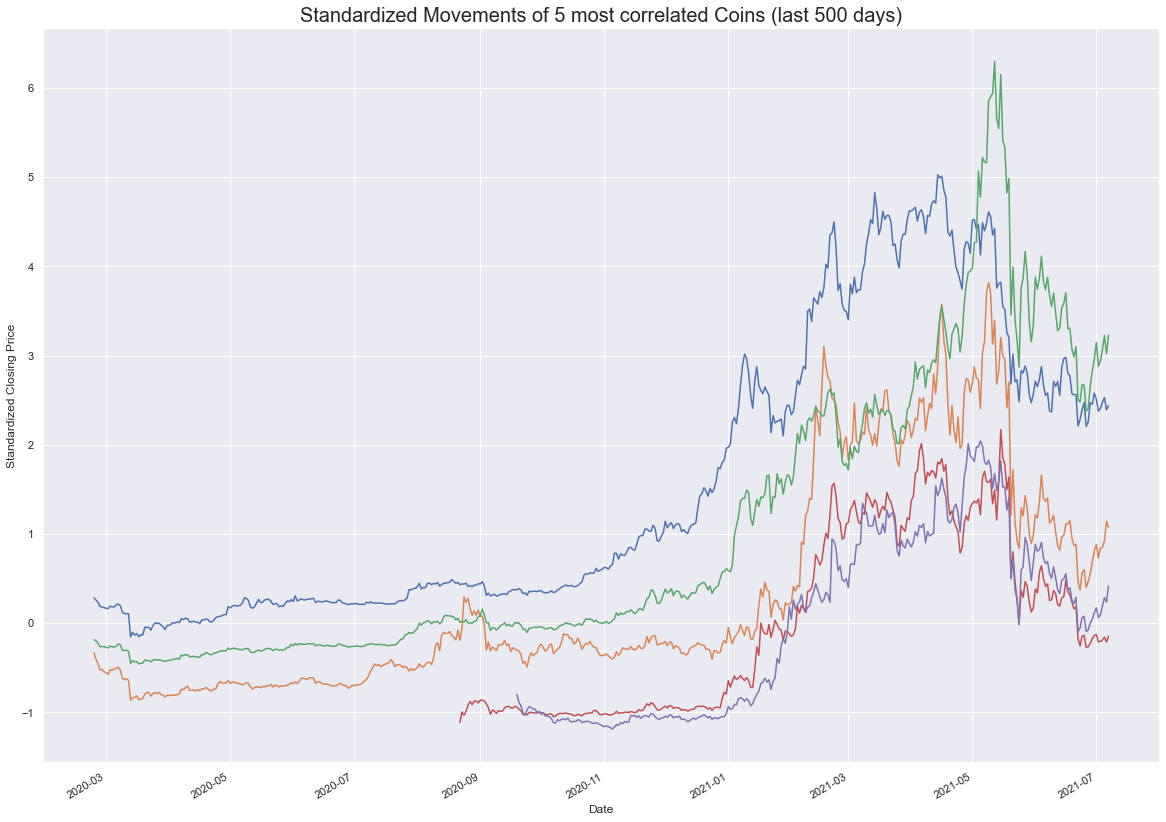

In [49]:
# plot only the last 500 days of the 5 coins



def plot_df2(df): #filename is the full relative (or absolute) path + filename + extension
    df_graph1 = df.iloc[-500:][['Date', 'Standard']] # only last 500 days
    df_graph1 = df_graph1.set_index('Date')
    df_graph1.Standard.plot()

plt.figure(figsize = (20,15))
plt.title('Standardized Movements of 5 most correlated Coins (last 500 days)', size=20)
plt.xlabel('Time')
plt.ylabel('Standardized Closing Price')
# plt.xlim([2017, ])

for df_name, df in dct.items():
    if df_name in ['df_Bitcoin', 'df_Cosmos', 'df_Ethereum', 'df_Polkadot', 'df_Uniswap']:
#     if df_name in ['df_Ethereum', 'df_Polkadot', 'df_Uniswap']:
        plot_df2(df)
#         plt.legend()
plt.savefig('./images/standardized_500.png')

<ipython-input-50-54918c114beb>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Coin'], rotation=90)


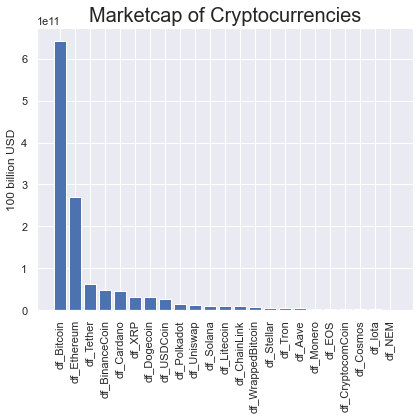

In [50]:
# bar chart of market cap by coin (descending) #23 bars

lst_coin = keys
lst_marketcap = list()

for i in range(len(keys)):
    lst_marketcap.append(dct[keys[i]].iloc[-1]['Marketcap'])
df = pd.DataFrame({'Coin':lst_coin, 'Marketcap':lst_marketcap})
df = df.sort_values('Marketcap', ascending = False)


fig, ax = plt.subplots(figsize = (6,6))
ax.set_xticklabels(df['Coin'], rotation=90)
ax.bar(df.iloc[:,0], df.iloc[:,1]) #or can just pass in column nmaes
# plt.yscale('log') # change scale to log

ax.set_title('Marketcap of Cryptocurrencies', size = 20)
ax.set_ylabel('100 billion USD')
plt.tight_layout()
plt.savefig('./images/marketcap.png')

<ipython-input-51-eec6c3c48935>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Coin'], rotation=90)


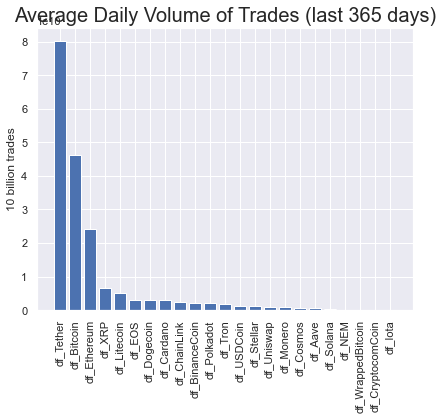

In [51]:
# bar chart of coins ranked by volume traded in the past 365 days

lst_coin = keys
lst_volume = list()

for i in range(len(keys)):
#     one_year = dct[keys['Date'].max() - pd.DateOffset(years=1)
#     lst_volume.append(df[one_year : keys['Date'].max()])['Volume'].mean()
    lst_volume.append(dct[keys[i]].iloc[-365:]['Volume'].mean())
df = pd.DataFrame({'Coin':lst_coin, 'Volume':lst_volume})
df = df.sort_values('Volume', ascending = False)


fig, ax = plt.subplots(figsize = (6,6))
ax.set_xticklabels(df['Coin'], rotation=90)
ax.bar(df.iloc[:,0], df.iloc[:,1]) #or can just pass in column nmaes
# plt.yscale('log') # change scale to log

ax.set_title('Average Daily Volume of Trades (last 365 days)', size = 20)
ax.set_ylabel('10 billion trades')
plt.tight_layout()
plt.savefig('./images/volume.png')

<ipython-input-52-25af5424b0b0>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Coin'], rotation=90)
<ipython-input-52-25af5424b0b0>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Coin'], rotation=90)


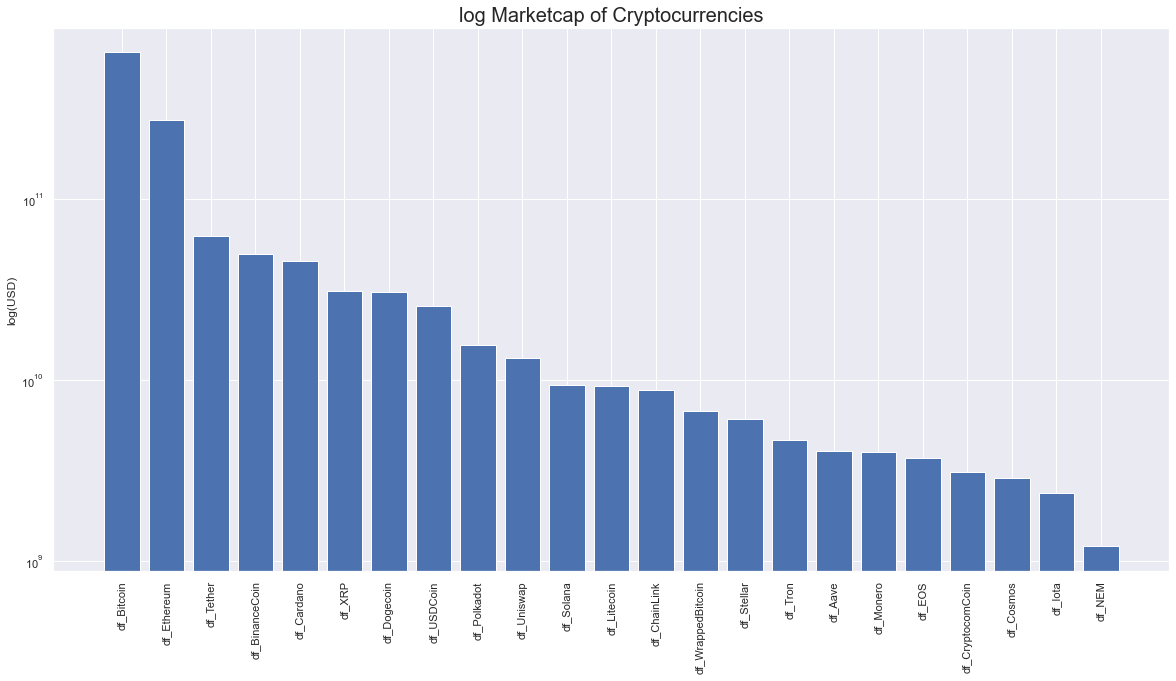

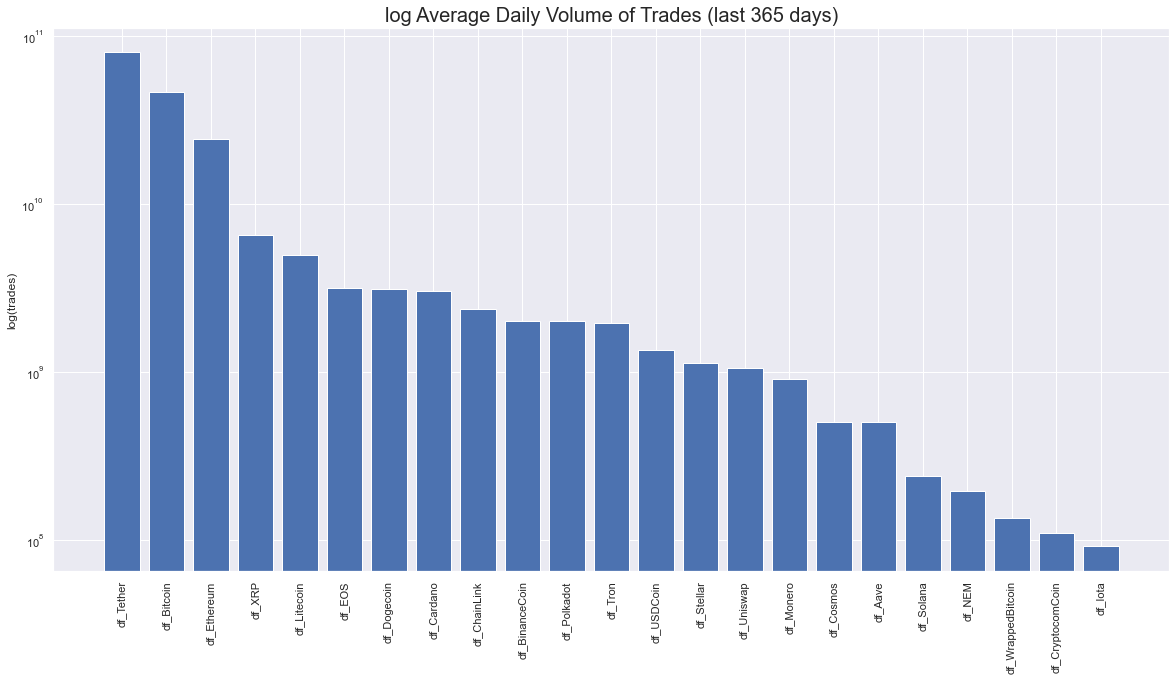

In [52]:
# log-scale of above 2 barcharts

# bar chart of market cap by coin (descending) #23 bars

lst_coin = keys
lst_marketcap = list()

for i in range(len(keys)):
    lst_marketcap.append(dct[keys[i]].iloc[-1]['Marketcap'])
df = pd.DataFrame({'Coin':lst_coin, 'Marketcap':lst_marketcap})
df = df.sort_values('Marketcap', ascending = False)


fig, ax = plt.subplots(figsize = (20,10))
ax.set_xticklabels(df['Coin'], rotation=90)
ax.bar(df.iloc[:,0], df.iloc[:,1]) #or can just pass in column nmaes
plt.yscale('log') # change scale to log

ax.set_title('log Marketcap of Cryptocurrencies', size = 20)
ax.set_ylabel('log(USD)')
plt.savefig('./images/log_marketcap.png')


# bar chart of coins ranked by volume traded in the past 365 days

lst_coin = keys
lst_volume = list()

for i in range(len(keys)):
#     one_year = dct[keys['Date'].max() - pd.DateOffset(years=1)
#     lst_volume.append(df[one_year : keys['Date'].max()])['Volume'].mean()
    lst_volume.append(dct[keys[i]].iloc[-365:]['Volume'].mean())
df = pd.DataFrame({'Coin':lst_coin, 'Volume':lst_volume})
df = df.sort_values('Volume', ascending = False)


fig, ax = plt.subplots(figsize = (20,10))
ax.set_xticklabels(df['Coin'], rotation=90)
ax.bar(df.iloc[:,0], df.iloc[:,1]) #or can just pass in column nmaes
plt.yscale('log') # change scale to log

ax.set_title('log Average Daily Volume of Trades (last 365 days)', size = 20)
ax.set_ylabel('log(trades)')
plt.savefig('./images/log_volume.png')